In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

In [2]:
from os import listdir
from sklearn.model_selection import train_test_split
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
%matplotlib inline
from keras.applications import InceptionResNetV2,VGG16,VGG19,Xception,ResNet50,InceptionV3
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [3]:
!echo "Number of Normal images"
!ls -l data/DATA_I_MADE/Images/Normal | egrep -c '^-'

Number of Normal images
541


In [4]:
!echo "Number of Trolled images"
!ls -l data/DATA_I_MADE/Images/Trolled | egrep -c '^-'

Number of Trolled images
557


In [5]:
Normal_Images = ['data/DATA_I_MADE/Images/Normal/'+i for i in listdir('data/DATA_I_MADE/Images/Normal')]
Trolled_Images = ['data/DATA_I_MADE/Images/Trolled/'+i for i in listdir('data/DATA_I_MADE/Images/Trolled')]
Y_normal = [0]*len(Normal_Images)
Y_trolled = [1]*len(Trolled_Images)
len(Normal_Images),len(Y_normal),len(Trolled_Images),len(Y_trolled)

(541, 541, 557, 557)

In [6]:
Images = Normal_Images+Trolled_Images
labels = Y_normal+Y_trolled
len(Images),len(labels)

(1098, 1098)

In [7]:
import random

In [9]:
random.shuffle(labels)

In [10]:
labels

[1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [11]:
trainX, testX, trainY, testY = train_test_split(Images, labels, test_size=0.1, random_state=42, stratify=labels)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.11, random_state=42, stratify=trainY)

In [12]:
def dump_to_pkl(file_location,item):
    with open(file_location, 'wb') as fp:
        pickle.dump(item, fp)

In [13]:
dump_to_pkl('data/DATA_I_MADE/train_test_val_split/trainX.pickle',trainX)
dump_to_pkl('data/DATA_I_MADE/train_test_val_split/testX.pickle',testX)
dump_to_pkl('data/DATA_I_MADE/train_test_val_split/valX.pickle',valX)
dump_to_pkl('data/DATA_I_MADE/train_test_val_split/trainY.pickle',trainY)
dump_to_pkl('data/DATA_I_MADE/train_test_val_split/testY.pickle',testY)
dump_to_pkl('data/DATA_I_MADE/train_test_val_split/valY.pickle',valY)

In [14]:
def read_from_pkl(file_location):
    with open (file_location, 'rb') as fp:
        itemlist = pickle.load(fp)
    return itemlist

In [15]:
trainX = read_from_pkl('data/DATA_I_MADE/train_test_val_split/trainX.pickle')
testX = read_from_pkl('data/DATA_I_MADE/train_test_val_split/testX.pickle')
valX = read_from_pkl('data/DATA_I_MADE/train_test_val_split/valX.pickle')
trainY = read_from_pkl('data/DATA_I_MADE/train_test_val_split/trainY.pickle')
testY = read_from_pkl('data/DATA_I_MADE/train_test_val_split/testY.pickle')
valY = read_from_pkl('data/DATA_I_MADE/train_test_val_split/valY.pickle')

In [16]:
len(trainX),len(trainY),len(testX),len(testY),len(valX),len(valY)

(879, 879, 110, 110, 109, 109)

In [17]:
length = 306
width = 306
channels = 3

In [18]:
def read_and_process_image(list_of_images):
    X = [] 
    for image in tqdm(list_of_images):
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (length,width), interpolation=cv2.INTER_CUBIC))  
    return X

In [19]:
trainX = read_and_process_image(trainX)
testX = read_and_process_image(testX)
valX = read_and_process_image(valX)

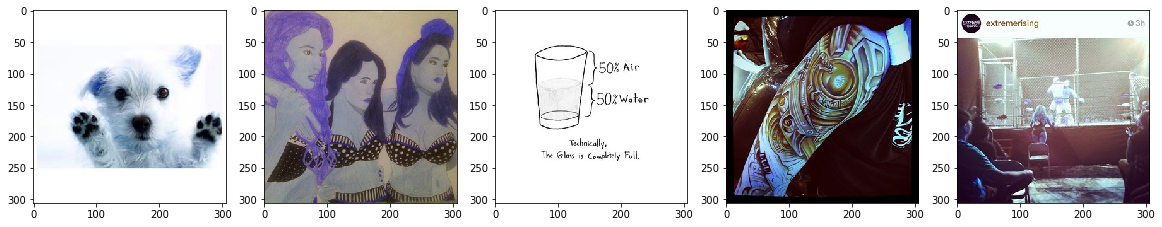

In [20]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(trainX[i])

In [21]:
trainX = np.array(trainX)
testX = np.array(testX)
valX = np.array(valX)
trainY = np.array(trainY)
testY = np.array(testY)
valY = np.array(valY)

In [22]:
ntrain = len(trainX)
ntest = len(testX)
nval = len(valX)

In [37]:
batch_size = 32
number_of_epoch = 300
data_augmentation_flag = True
learning_rate = 0.0001
base_model = 'VGG 19'

In [24]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(306,306,3))
# conv_base = VGG16(weights='imagenet')

In [25]:
# conv_base.summary()

In [26]:
def custom_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(306, 306, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(96, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [38]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# model=custom_cnn_model()

In [39]:
conv_base.trainable = False

In [40]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=learning_rate), metrics=['acc'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 9, 9, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 41472)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               21234176  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 41,259,073
Trainable params: 21,234,689
Non-trainable params: 20,024,384
_________________________________________________________________


In [42]:
tensorboard = TensorBoard(log_dir=f'logs/random_labels|{base_model}|{learning_rate}|{number_of_epoch}|{time()}|dropout')

In [43]:
if data_augmentation_flag:
    train_datagen = ImageDataGenerator(rescale=1./255,   
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
else:
    train_datagen = ImageDataGenerator(rescale=1./255)


test_val_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow(trainX, trainY,batch_size=batch_size)
val_generator = test_val_datagen.flow(valX, valY, batch_size=batch_size)

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=number_of_epoch,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size,
                              verbose=2,
                              callbacks=[tensorboard])

Epoch 1/300
 - 17s - loss: 0.8626 - acc: 0.5000 - val_loss: 0.7146 - val_acc: 0.5312
Epoch 2/300
 - 15s - loss: 0.7732 - acc: 0.5375 - val_loss: 0.6824 - val_acc: 0.5325
Epoch 3/300
 - 15s - loss: 0.7273 - acc: 0.5252 - val_loss: 0.7111 - val_acc: 0.4675
Epoch 4/300
 - 15s - loss: 0.6878 - acc: 0.5756 - val_loss: 0.7334 - val_acc: 0.5455
Epoch 5/300
 - 15s - loss: 0.7365 - acc: 0.5324 - val_loss: 0.6939 - val_acc: 0.5312
Epoch 6/300
 - 15s - loss: 0.7066 - acc: 0.5405 - val_loss: 0.6786 - val_acc: 0.5455
Epoch 7/300
 - 15s - loss: 0.6858 - acc: 0.5743 - val_loss: 0.6954 - val_acc: 0.4805
Epoch 8/300
 - 15s - loss: 0.6771 - acc: 0.5729 - val_loss: 0.6958 - val_acc: 0.5844
Epoch 9/300
 - 15s - loss: 0.6659 - acc: 0.6009 - val_loss: 0.6587 - val_acc: 0.5417
Epoch 10/300
 - 15s - loss: 0.6783 - acc: 0.5860 - val_loss: 0.6737 - val_acc: 0.5195
Epoch 11/300
 - 15s - loss: 0.6586 - acc: 0.6194 - val_loss: 0.6507 - val_acc: 0.6883
Epoch 12/300
 - 14s - loss: 0.6820 - acc: 0.5766 - val_loss: 0.

Epoch 97/300
 - 15s - loss: 0.5223 - acc: 0.7393 - val_loss: 0.7458 - val_acc: 0.5729
Epoch 98/300
 - 16s - loss: 0.5092 - acc: 0.7423 - val_loss: 0.7612 - val_acc: 0.5584
Epoch 99/300
 - 15s - loss: 0.5326 - acc: 0.7252 - val_loss: 0.6994 - val_acc: 0.6494
Epoch 100/300
 - 15s - loss: 0.5346 - acc: 0.7225 - val_loss: 0.7259 - val_acc: 0.5714
Epoch 101/300
 - 16s - loss: 0.5107 - acc: 0.7483 - val_loss: 0.7481 - val_acc: 0.6042
Epoch 102/300
 - 15s - loss: 0.5085 - acc: 0.7469 - val_loss: 0.7115 - val_acc: 0.5714
Epoch 103/300
 - 15s - loss: 0.5413 - acc: 0.7305 - val_loss: 0.7392 - val_acc: 0.5974
Epoch 104/300
 - 15s - loss: 0.4941 - acc: 0.7552 - val_loss: 0.7780 - val_acc: 0.6104
Epoch 105/300
 - 15s - loss: 0.5470 - acc: 0.7159 - val_loss: 0.7432 - val_acc: 0.5521
Epoch 106/300
 - 15s - loss: 0.4983 - acc: 0.7576 - val_loss: 0.7072 - val_acc: 0.6364
Epoch 107/300


In [35]:
test_pred_labels=[]
i=0
for batch in tqdm(test_val_datagen.flow(testX, batch_size=1)):
    pred = model.predict(batch)
    if pred > 0.5:
        test_pred_labels.append(1)
    else:
        test_pred_labels.append(0)
    i+=1
    if i==ntest:
        break

In [36]:
accuracy_score(testY, test_pred_labels)

0.5181818181818182